<a href="https://colab.research.google.com/github/sarasantosdev/estatistica_R/blob/master/analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estatística com R

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
dados <- read.csv("base.csv")

In [4]:
glimpse(dados)
head(dados)

Rows: 200,000
Columns: 10
$ id_compra         <chr> "9f86e969-221a-4b1a-9b48-9aba719b61cf", "659f9b07-be…
$ sexo_biologico    <chr> "Masculino", "Feminino", "Feminino", "Feminino", "Ma…
$ idade_cliente     <int> 33, 33, 36, 21, 31, 29, 44, 19, 24, 36, 32, 24, 41, …
$ regiao_cliente    <chr> "Sul", "Nordeste", "Sudeste", "Sul", "Centro-Oeste",…
$ categoria_produto <chr> "Ferramentas e Construção", "Alimentos e Bebidas", "…
$ preco_unitario    <dbl> 96.80, 247.68, 627.46, 2025.07, 99.24, 131.20, 909.8…
$ quantidade        <int> 2, 1, 2, 8, 5, 1, 2, 3, 3, 7, 1, 2, 2, 6, 1, 5, 7, 5…
$ total_compra      <dbl> 193.60, 247.68, 1254.92, 16200.56, 496.20, 131.20, 1…
$ tempo_entrega     <int> 18, 6, 8, 6, 13, 13, 14, 11, 10, 14, 5, 10, 16, 8, 6…
$ avaliacao         <int> 1, 4, 5, 5, 5, 5, 5, 4, 3, 3, 4, 4, 4, 5, 2, 5, 5, 3…


,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao
,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>
1,9f86e969-221a-4b1a-9b48-9aba719b61cf,Masculino,33,Sul,Ferramentas e Construção,96.80,2,193.60,18,1
2,659f9b07-be10-4849-b2ab-dd542498a1e8,Feminino,33,Nordeste,Alimentos e Bebidas,247.68,1,247.68,6,4
3,d317d7df-1126-42e5-bf4b-0e178bd4e14e,Feminino,36,Sudeste,Eletrônicos,627.46,2,1254.92,8,5
4,bb99bcf6-b333-493e-9ec2-c39f8695503c,Feminino,21,Sul,Eletrônicos,2025.07,8,16200.56,6,5
5,898e4624-84e9-4c41-b181-66d3b7ccfef7,Masculino,31,Centro-Oeste,Papelaria e Escritório,99.24,5,496.20,13,5
6,bbbaecc2-2d97-4c02-a69c-77ccfb2c8a26,Masculino,29,Nordeste,Beleza e Cuidados Pessoais,131.20,1,131.20,13,5


In [5]:
dados %>% distinct(categoria_produto)

categoria_produto
<chr>
Ferramentas e Construção
Alimentos e Bebidas
Eletrônicos
Papelaria e Escritório
Beleza e Cuidados Pessoais
Casa e Mobílias
"Roupas, Calçados e Acessórios"
Livros
Brinquedos


In [6]:
produtos <- dados %>% count(categoria_produto, sort=T)

In [7]:
produtos

categoria_produto,n
<chr>,<int>
Eletrônicos,36060
"Roupas, Calçados e Acessórios",27917
Casa e Mobílias,26015
Beleza e Cuidados Pessoais,22026
Esporte e Lazer,19939
Alimentos e Bebidas,18022
Papelaria e Escritório,13936
Livros,13790
Ferramentas e Construção,12063


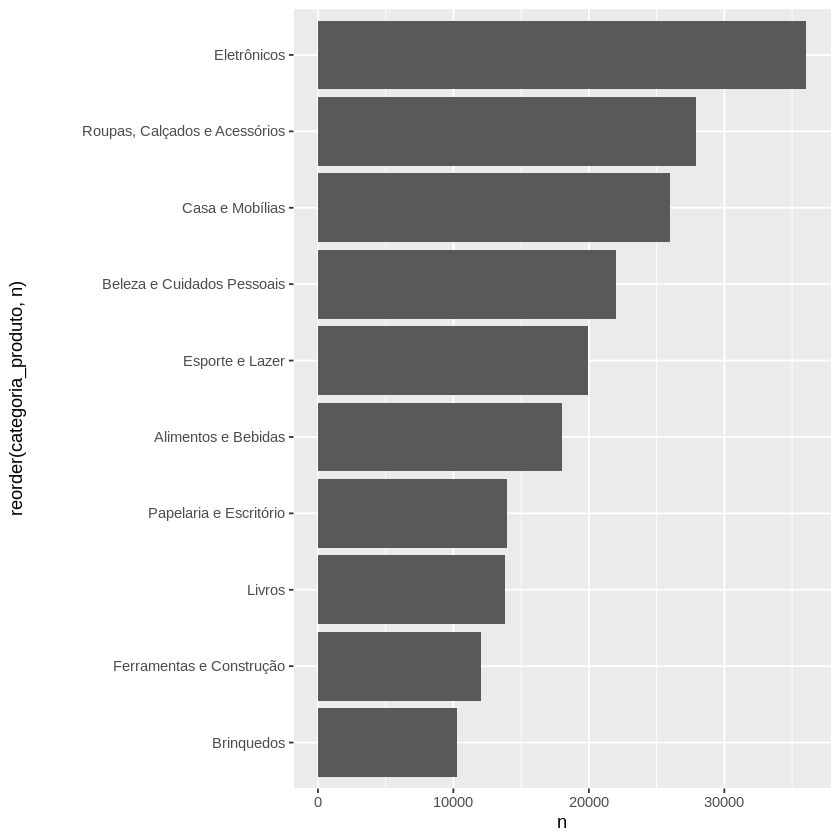

In [8]:
ggplot(produtos)+geom_col(aes(x=n, y=reorder(categoria_produto, n)))

In [9]:
dados <- dados %>% mutate(avaliacao_indicador = factor(avaliacao,
                                             levels = c(1, 2, 3, 4, 5),
                                             labels = c("Péssimo", "Ruim", "Regular", "Bom", "Ótimo")))

In [10]:
head(dados, 5)

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao,avaliacao_indicador
,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<fct>
1,9f86e969-221a-4b1a-9b48-9aba719b61cf,Masculino,33,Sul,Ferramentas e Construção,96.80,2,193.60,18,1,Péssimo
2,659f9b07-be10-4849-b2ab-dd542498a1e8,Feminino,33,Nordeste,Alimentos e Bebidas,247.68,1,247.68,6,4,Bom
3,d317d7df-1126-42e5-bf4b-0e178bd4e14e,Feminino,36,Sudeste,Eletrônicos,627.46,2,1254.92,8,5,Ótimo
4,bb99bcf6-b333-493e-9ec2-c39f8695503c,Feminino,21,Sul,Eletrônicos,2025.07,8,16200.56,6,5,Ótimo
5,898e4624-84e9-4c41-b181-66d3b7ccfef7,Masculino,31,Centro-Oeste,Papelaria e Escritório,99.24,5,496.20,13,5,Ótimo


In [11]:
dados %>% distinct(avaliacao, avaliacao_indicador) %>% arrange(avaliacao)

avaliacao,avaliacao_indicador
<int>,<fct>
1,Péssimo
2,Ruim
3,Regular
4,Bom
5,Ótimo


In [12]:
dados %>% distinct(total_compra)

total_compra
<dbl>
193.60
247.68
1254.92
16200.56
496.20
131.20
1819.66
3297.00
3320.07


In [13]:
sprintf("Vendemos produtos de  %s até %s reais",
        format(min(dados$total_compra), big.mark = ",", nsmall = "2"),
        format(max(dados$total_compra), big.mark = ",", nsmall = "2"))

[1] "Vendemos produtos de  5.05 até 20,744.70 reais"

In [14]:
glue::glue("Vendemos de {min(dados$quantidade)} até {max(dados$quantidade)} por registro")

Vendemos de 1 até 10 por registro

## Identificando o perfil do público

In [15]:
freq_avaliacoes <- dados %>% group_by(avaliacao_indicador) %>% summarise(freq_absoluta = n()) %>% arrange(desc(avaliacao_indicador))

In [16]:
freq_avaliacoes

avaliacao_indicador,freq_absoluta
<fct>,<int>
Ótimo,66076
Bom,40980
Regular,32282
Ruim,28239
Péssimo,32423


In [17]:
freq_avaliacoes <- freq_avaliacoes %>%
  mutate(freq_relativa = round((freq_absoluta/sum(freq_absoluta))*100, 1))

In [18]:
freq_avaliacoes

avaliacao_indicador,freq_absoluta,freq_relativa
<fct>,<int>,<dbl>
Ótimo,66076,33.0
Bom,40980,20.5
Regular,32282,16.1
Ruim,28239,14.1
Péssimo,32423,16.2


In [19]:
colnames(freq_avaliacoes) <- c("Avaliação", "Quantidade", "Porcentagem(%)")
freq_avaliacoes

Avaliação,Quantidade,Porcentagem(%)
<fct>,<int>,<dbl>
Ótimo,66076,33.0
Bom,40980,20.5
Regular,32282,16.1
Ruim,28239,14.1
Péssimo,32423,16.2


## Plotando gráfico

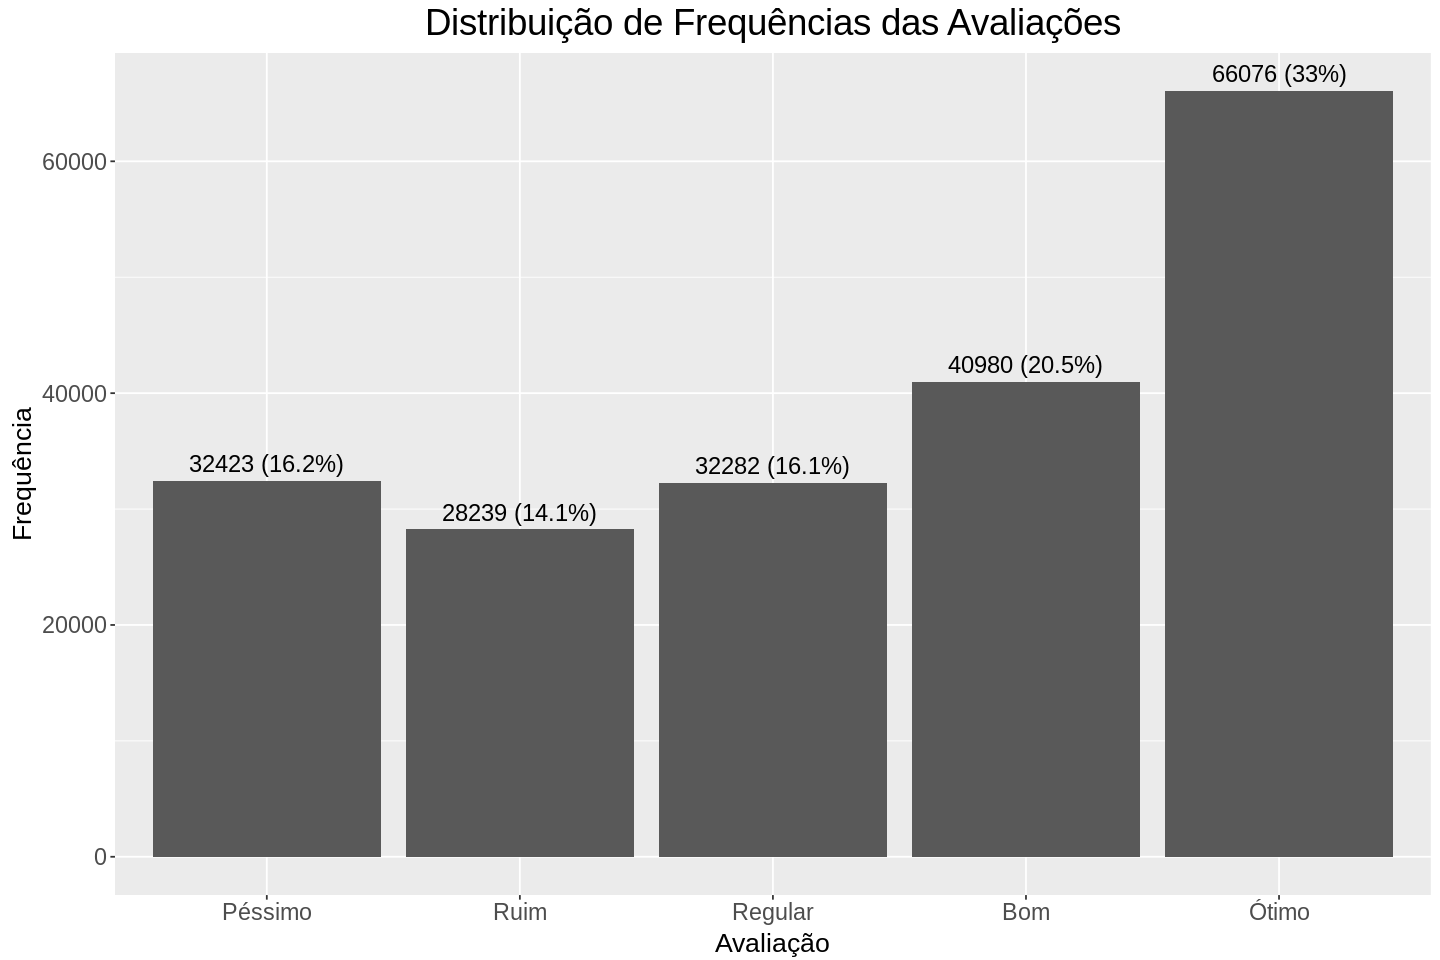

In [20]:
options(repr.plot.width = 12, repr.plot.height = 8)
tema <- theme(
  plot.title=element_text(size = 22, hjust = 0.5),
  axis.title.y=element_text(size = 16, vjust = +0.2),
  axis.title.x=element_text(size = 16, vjust = -0.2),
  axis.text.y=element_text(size = 14),
  axis.text.x=element_text(size = 14))

ggplot(freq_avaliacoes, aes(x = `Avaliação`, y = Quantidade)) +
  geom_bar(stat = "identity") +
  ggtitle("Distribuição de Frequências das Avaliações") +
  ylab("Frequência") +
  xlab("Avaliação") +
  geom_text(aes(label = glue::glue("{Quantidade} ({`Porcentagem(%)`}%)")), vjust = -0.5, size = 5) +
  tema